In [1]:
## need packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from functools import reduce
from datetime import timedelta 
import operator
import os
sns.set(style="ticks", color_codes=True)
%matplotlib inline

In [2]:
## configuration for filepath
filepath   = '../data/'
filename01 = 'merged_data_wo_ffill.csv'
outputpath = '../graph/mid/objective_2/'

In [3]:
## data type for sensing data
data_types = {'dev_id': np.string_,
'dev_dt': np.string_,
'pm25': np.string_,
'pm10': np.string_,
'voc_ref': np.string_,
'voc_now': np.string_,
'humi': np.string_,
'temp': np.string_,
'lux': np.string_,
'co2': np.string_,
'pm10_idx': np.string_,
'pm25_idx': np.string_,
'vocs_idx': np.string_,
'co2_idx': np.string_,
'iaq_idx': np.string_,
'unpl_idx': np.string_,
'polt_idx': np.string_,
'dt': np.string_,
'invnr': np.string_,
'inbdt': np.string_,
'use_cust_id': np.string_,
'pyn': np.string_,
'room_cnt': np.string_,
'do_nm': np.string_,
'ct_nm': np.string_,
'gu_nm': np.string_,
'dng_nm': np.string_,
'apts_in_date': np.string_,
'bldg_tp': np.string_,
'rtn_conf_dt': np.string_,
'age': np.string_,
'sex': np.string_,
'cust_tpnm': np.string_}

In [4]:
def generate_graph(data, s_date, e_date, path):
    target_data = data[data['dev_dt'].between(s_date, e_date)]
    if not os.path.exists(path + data['dev_id'].unique()[0]):
        os.makedirs(path + data['dev_id'].unique()[0])
        
    ## graph configure
    palette = sns.color_palette("muted", n_colors=7)
    sns.set_palette(palette)
    kws = dict(s=10, linewidth=.5, edgecolor="w")    # for scatter plot
    plt.style.use('seaborn-darkgrid')
    fig = plt.figure(figsize=(30,10))
    area01 = plt.subplot2grid((3,4), (0,0), rowspan = 1, colspan = 4)
    if target_data['mode_stng'].nunique() == 1:
        sns.scatterplot(x="dev_dt", y="pm10", data=target_data, legend='full',**kws)
    else:
        sns.scatterplot(x="dev_dt", y="pm10", hue="mode_stng", data=target_data, legend='full',**kws)
    area01.xaxis.label.set_visible(False)
    plt.xlim((s_date, e_date))
    area02 = plt.subplot2grid((3,4), (1,0), rowspan = 1, colspan = 4)
    if target_data['mode_stng'].nunique() == 1:
        sns.scatterplot(x="dev_dt", y="co2", data=target_data, legend='full',**kws)
    else:
        sns.scatterplot(x="dev_dt", y="co2", hue="mode_stng", data=target_data, legend='full',**kws)
    area02.xaxis.label.set_visible(False)
    plt.xlim((s_date, e_date))
    area03= plt.subplot2grid((3,4), (2,0), rowspan = 1, colspan = 2)
    sns.distplot(target_data[target_data['pm10'].notnull()]['pm10'], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3})
    area04= plt.subplot2grid((3,4), (2,2), rowspan = 4, colspan = 2)
    sns.boxplot(y='pm10', data=target_data, notch=True)
    plt.tight_layout()
    fig.savefig(path + data['dev_id'].unique()[0] + '/' + s_date.strftime('%Y%m%d') +'.png')
    plt.close('all')

In [5]:
%%time
check_data = pd.read_csv(filepath + '20181106_all_device_may_1_mnth/' + 'captain_iaq_meta_201805.csv', parse_dates=['dev_dt', 'apts_in_date', 'dt'])

<string>:2: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,19,20,21,22,29,30) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 6min 34s, sys: 31.2 s, total: 7min 5s
Wall time: 7min 5s


In [6]:
check_data = check_data[check_data['dev_dt'] != 'dev_dt']

In [7]:
%%time
check_data['dev_dt'] = pd.to_datetime(check_data['dev_dt'], format='%Y-%m-%d %H:%M:%S.%f')
check_data['dt'] = pd.to_datetime(check_data['dt'], format='%Y-%m-%d %H:%M:%S.%f')
check_data['pm25'] = check_data['pm25'].astype(np.number)
check_data['pm10'] = check_data['pm10'].astype(np.number)
check_data['voc_ref'] = check_data['voc_ref'].astype(np.number)
check_data['voc_now'] = check_data['voc_now'].astype(np.number)
check_data['humi'] = check_data['humi'].astype(np.number)
check_data['temp'] = check_data['temp'].astype(np.number)
check_data['lux'] = check_data['lux'].astype(np.number)
check_data['co2'] = check_data['co2'].astype(np.number)
check_data['pm10_idx'] = check_data['pm10_idx'].astype(np.number)
check_data['pm25_idx'] = check_data['pm25_idx'].astype(np.number)
check_data['vocs_idx'] = check_data['vocs_idx'].astype(np.number)
check_data['co2_idx'] = check_data['co2_idx'].astype(np.number)
check_data['iaq_idx'] = check_data['iaq_idx'].astype(np.number)
check_data['unpl_idx'] = check_data['unpl_idx'].astype(np.number)
check_data['polt_idx'] = check_data['polt_idx'].astype(np.number)
check_data['room_cnt'] = check_data['room_cnt'].astype(np.number)

CPU times: user 3min 17s, sys: 45.9 s, total: 4min 2s
Wall time: 4min 2s


In [8]:
%%time
check_data.reset_index(inplace=True)
check_data.drop('index', axis=1)

CPU times: user 13 s, sys: 5.13 s, total: 18.1 s
Wall time: 18.1 s


In [9]:
pm10_bins = [0, 30, 80, 150, 50000]
vocs_bins = [0, 55, 78, 87, 100]
co2_bins  = [0, 600, 1000, 3000, 5000]
labels = [1, 2, 3, 4]

## temp
# 21.5 <= x < 24.5
grade_temp = lambda x: 4 if ((17 <= x < 18.5) | (27.5 <= x < 29)) else 3 if ((18.5 <= x < 20) | (26 <= x < 27.5)) else 2 if ((20 <= x < 21.5) | (24.5 <= x < 26)) else 1
## humi
# (42. <= x < 57.5) 
grade_humi = lambda x: 4 if ((0 <= x < 27.5) | (72. <= x < 100)) else 3 if ((27. <= x < 35) | (65 <= x < 72.5)) else 2 if ((35 <= x < 42.5) | (57. <= x < 65)) else 1

In [10]:
%%time
check_data['pm10_grade'] = pd.cut(check_data['pm10'], bins=pm10_bins, labels=labels, include_lowest=True)
check_data['vocs_grade'] = pd.cut(check_data['vocs_idx'], bins=vocs_bins, labels=labels, include_lowest=True)
check_data['co2_grade'] = pd.cut(check_data['co2'], bins=co2_bins, labels=labels, include_lowest=True)
check_data['temp_grade'] = [grade_temp(check_data.loc[n, 'temp']) for n in range(len(check_data))]
check_data['humi_grade'] = [grade_temp(check_data.loc[n, 'humi']) for n in range(len(check_data))]

CPU times: user 56min 44s, sys: 12 ms, total: 56min 44s
Wall time: 56min 43s


In [ ]:
check_data.drop('index', axis=1, inplace=True)

In [186]:
%%time
check_data.to_csv(filepath + 'distribution_5_elements.csv', index=False)

CPU times: user 29min 8s, sys: 17.1 s, total: 29min 25s
Wall time: 29min 25s


In [15]:
check_data.head()

,dev_id,dev_dt,pm25,pm10,voc_ref,voc_now,humi,temp,lux,co2,...,bldg_tp,rtn_conf_dt,age,sex,cust_tpnm,pm10_grade,vocs_grade,co2_grade,temp_grade,humi_grade
0,19202D8F1671500524,2018-05-01 21:29:21.947,9.0,32.0,0.67,0.68,63.0,27.21,535.0,985.0,...,NaN,NaN,45,M,개인,2,1,2,3,1
1,19202ER01672200372,2018-05-01 23:33:14.841,7.0,24.0,0.83,0.84,52.0,28.29,893.0,1267.0,...,아파트,NaN,39,F,개인,1,1,3,4,1
2,19202D8F1642200099,2018-05-01 11:45:24.111,17.0,45.0,0.88,0.89,71.0,26.99,899.0,3351.0,...,다세대주택,2.01808e+07,39,F,개인,2,1,4,3,1
3,19202D8F1670700104,2018-05-01 10:48:28.711,11.0,39.0,0.65,0.64,55.0,25.47,894.0,950.0,...,아파트,NaN,57,F,개인,2,1,2,2,1
4,16302D8F15B0900003,2018-05-01 08:59:56.167,0.0,1.0,0.53,0.55,51.0,26.12,898.0,1301.0,...,아파트,NaN,45,F,개인,1,1,3,3,1


In [17]:
%%time
pm10_result = check_data.groupby('pm10_grade')['pm10_grade'].value_counts()
vocs_result = check_data.groupby('vocs_grade')['vocs_grade'].value_counts()
co2_result = check_data.groupby('co2_grade')['co2_grade'].value_counts()
temp_result = check_data.groupby('temp_grade')['temp_grade'].value_counts()
humi_result = check_data.groupby('humi_grade')['humi_grade'].value_counts()

CPU times: user 1min 6s, sys: 4 ms, total: 1min 6s
Wall time: 1min 6s


In [109]:
%%time
pm10_result.reset_index(level=1, drop=True, inplace=True)
vocs_result.reset_index(level=1, drop=True, inplace=True)
co2_result.reset_index(level=1, drop=True, inplace=True)
temp_result.reset_index(level=1, drop=True, inplace=True)
humi_result.reset_index(level=1, drop=True, inplace=True)

IndexError: Too many levels: Index has only 1 level, not 2

In [178]:
result = pd.concat([pd.concat([pd.DataFrame([pm10_result[i+1]], columns=['pm10_result']) for i in range(len(pm10_result))], ignore_index=True),
pd.concat([pd.DataFrame([vocs_result[i+1]], columns=['vocs_result']) for i in range(len(vocs_result))], ignore_index=True),
pd.concat([pd.DataFrame([co2_result[i+1]], columns=['co2_result'])  for i in range(len(co2_result ))], ignore_index=True),
pd.concat([pd.DataFrame([temp_result[i+1]], columns=['temp_result']) for i in range(len(temp_result))], ignore_index=True),
pd.concat([pd.DataFrame([humi_result[i+1]], columns=['humi_result']) for i in range(len(humi_result))], ignore_index=True)], axis=1)

In [179]:
result

,pm10_result,vocs_result,co2_result,temp_result,humi_result
0,52633877,67425827,29412071,18898426,67356610
1,11437292,10232,24477429,25686101,21716
2,2467960,3131,13404020,18082882,70877
3,974537,74476,220146,4846257,64463


In [180]:
result_per = result/len(check_data) * 100

In [181]:
result_per

,pm10_result,vocs_result,co2_result,temp_result,humi_result
0,77.960330,99.869894,43.564618,27.992001,99.767372
1,16.940706,0.015155,36.255518,38.045780,0.032165
2,3.655497,0.004638,19.853788,26.784032,0.104982
3,1.443466,0.110312,0.326076,7.178187,0.095481


In [ ]:
%%time
check_data['pm10_grade'] = check_data['pm10_grade'].astype('int')
check_data['vocs_grade'] = check_data['vocs_grade'].astype('int')
check_data['co2_grade'] = check_data['co2_grade'].astype('int')

CPU times: user 1.78 s, sys: 8 ms, total: 1.79 s
Wall time: 1.79 s


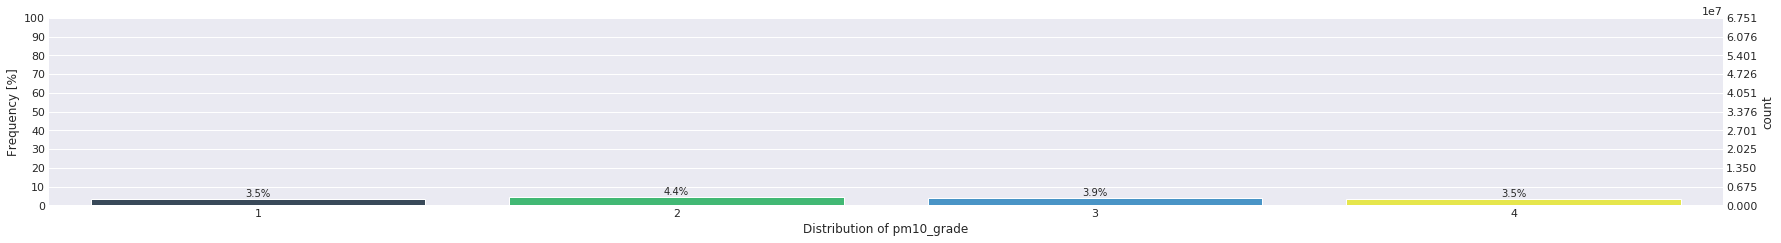

In [183]:
%%time
## graph configure
colors = ['#34495e','#2ecc71','#3498db','#FFFF33','#e74c3c','#a9a9a9']
sns.set_palette(colors)
palette = sns.color_palette()
plt.style.use('seaborn-darkgrid')
ncount = len(check_data)

fig = plt.figure(figsize=(30,20))
area01 = plt.subplot2grid((5,4), (0,0), rowspan = 1, colspan = 4)
# Some random data
ax = sns.countplot(x="pm10", data=check_data, order=[1,2,3,4])
plt.xlabel('Distribution of pm10_grade')
ax2=ax.twinx()
ax2.yaxis.tick_left()
ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')
ax2.set_ylabel('Frequency [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100)
ax.set_ylim(0,ncount)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

# plt.tight_layout()
# fig.savefig(path + data['dev_id'].unique()[0] + '/' + s_date.strftime('%Y%m%d') +'.png')
# plt.close('all')